<a href="https://colab.research.google.com/github/d4u0ul/projects/blob/master/Copy_of_LeituraDeDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Upload dos Arquivos**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# ***Imports***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# ***Codigo***

In [ ]:
df = pd.read_csv('/content/drive/Shareddrives/Mineração de Dados/expFinal.csv',sep=';',na_values= '?')

In [ ]:
df.columns = ["idUsrCrsExp","userProfile_Id","discriminator","taskValidationDescription","course_Id","challenge_Id","task_Id","taskOrder","ordemTsk","isdone","isRight","startUsrCrsExp","startValid","tmpInicio","tmpFim","tempoInteracao"]


In [ ]:
df.head(1)

,idUsrCrsExp,userProfile_Id,discriminator,taskValidationDescription,course_Id,challenge_Id,task_Id,taskOrder,ordemTsk,isdone,isRight,startUsrCrsExp,startValid,tmpInicio,tmpFim,tempoInteracao
0,22902,7,TaskExperience,Dosadora SFC - 2 Tarefa 1,4,80,144,1,task 1 de 1,1,1,2020-05-20 18:30:05.803,2020-05-20 18:30:09.433,2020-05-20 18:30:05.160,2020-05-20 18:30:10.673,0


In [ ]:
df.describe()

,idUsrCrsExp,userProfile_Id,course_Id,challenge_Id,task_Id,taskOrder,isdone,isRight,tempoInteracao
count,32965.000000,32965.000000,32965.000000,32965.000000,32965.000000,32965.000000,32965.000000,32965.000000,32965.000000
mean,24342.795086,2108.252905,18.014349,90.557895,176.303443,2.691825,0.955347,0.344517,34.598756
std,5225.323333,997.608466,12.483434,93.158587,176.114128,2.114289,0.206545,0.475218,38.017029
min,14406.000000,7.000000,1.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,19412.000000,1472.000000,11.000000,28.000000,24.000000,1.000000,1.000000,0.000000,7.000000
50%,25314.000000,1941.000000,11.000000,45.000000,122.000000,2.000000,1.000000,0.000000,23.000000
75%,28437.000000,3096.000000,25.000000,127.000000,220.000000,4.000000,1.000000,1.000000,46.000000
max,32778.000000,4150.000000,59.000000,373.000000,660.000000,12.000000,1.000000,1.000000,197.000000


In [ ]:
sns.set_theme(style="darkgrid")

In [ ]:
Erros = df.query('isRight == 0')
Acertos = df.query('isRight == 1')

In [ ]:
# Quantidade de tentativas por tarefa
tentativas = df.groupby('task_Id')['isRight']
grp = pd.DataFrame(tentativas.size().reset_index(name = "isRight"))
grp

,task_Id,isRight
0,2,455
1,3,315
2,4,333
3,5,80
4,6,202
...,...,...
456,652,26
457,653,22
458,655,52
459,659,19


### Graficos Atualizados

In [ ]:
# Quantidades de Erro e Acerto Por atividade (Amostra)
gr = df.groupby(['task_Id','isRight'])['tempoInteracao'].count()
gr = gr.reset_index(name = "tempoInteracao")
gr.head(10)

,task_Id,isRight,tempoInteracao
0,2,0,276
1,2,1,179
2,3,0,119
3,3,1,196
4,4,0,258
5,4,1,75
6,5,0,15
7,5,1,65
8,6,0,134
9,6,1,68


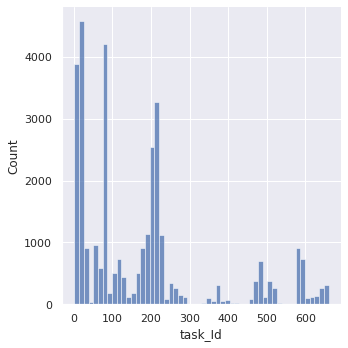

In [ ]:
sns.displot(df, x="task_Id", multiple="dodge")

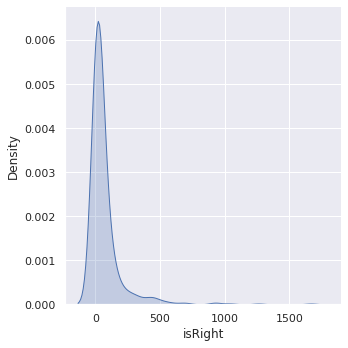

In [ ]:
# Densidade da Quantidade de tentativas 
sns.displot(grp,x= "isRight",kind="kde",fill = "true")

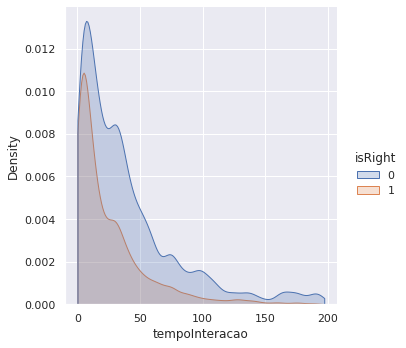

In [ ]:
sns.displot(df, x="tempoInteracao", hue="isRight", kind="kde", fill=True , cut=0)

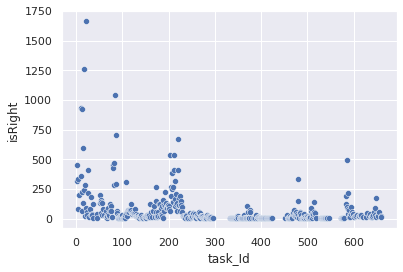

In [ ]:
# Dispersão da quantidade de tentativas
sns.scatterplot(x ='task_Id', y="isRight",data = grp)
#Mostra que ao inicio existe uma maior quantidade de tentativas 

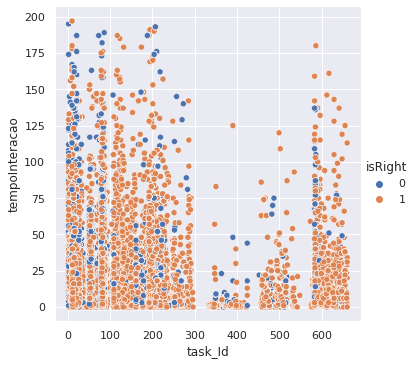

In [ ]:
sns.relplot(x="task_Id", y="tempoInteracao", hue="isRight", data=df);

## ***Distribuição de frequência***

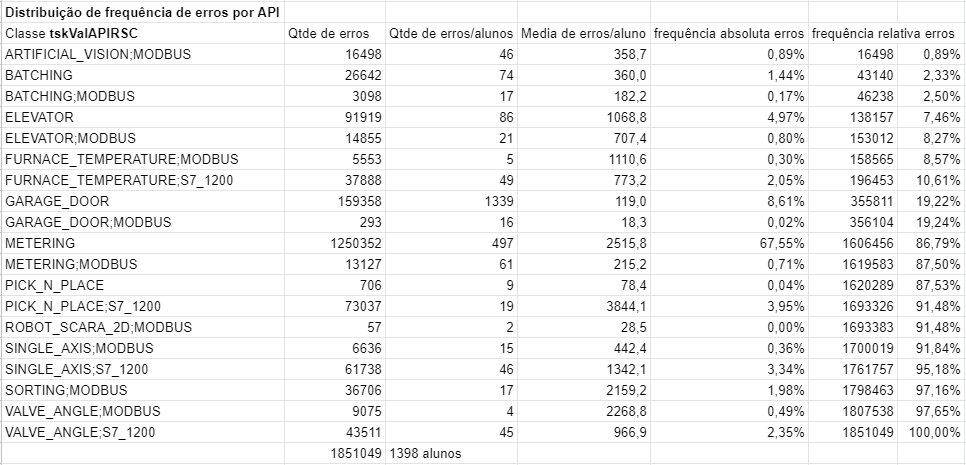

# ***Graficos Base de dados anterior***

In [ ]:
#df=df.dropna()

In [ ]:
#erros
#dummy = old_df.query('tskvalIsRight == 0')

### ***Histograma***

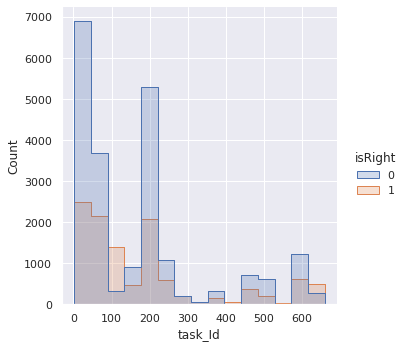

In [ ]:
sns.displot(df, x="task_Id", hue="isRight", element="step",bins=15,label='Acerto')

### ***Qtdes de erros e acertos por Tasks***

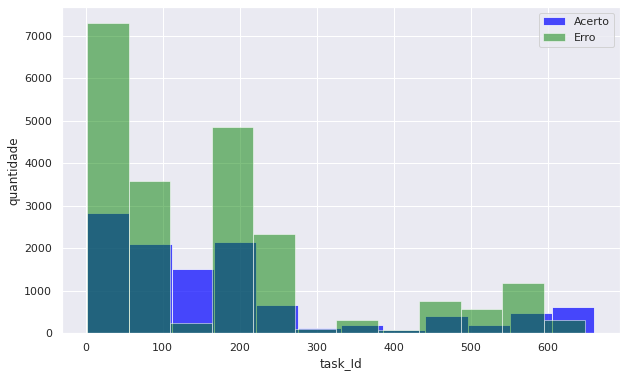

In [ ]:
plt.figure(figsize=(10, 6))
df[df['isRight'] == 1]['task_Id'].hist(alpha=0.7, color='blue', bins=12, label='Acerto')
df[df['isRight'] == 0]['task_Id'].hist(alpha=0.5, color='green', bins=12, label='Erro')
plt.legend()
plt.xlabel('task_Id')
plt.ylabel('quantidade')
plt.show()

### ***Qtdes de erros e acertos por Challenges***

In [ ]:
# sns.displot(old_df, x="TimeInMinutes", hue="IsRight", kind="kde", fill=True , cut=0)

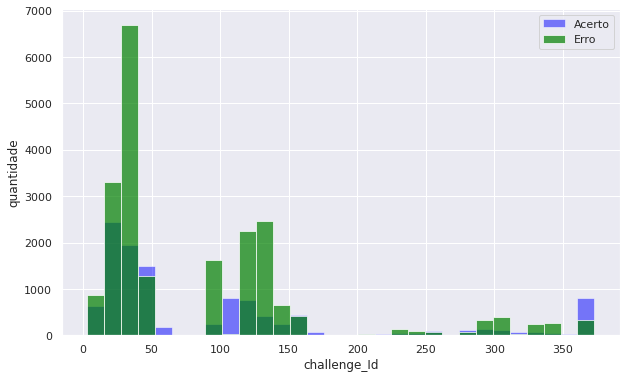

In [ ]:
plt.figure(figsize=(10, 6))
df[df['isRight'] == 1]['challenge_Id'].hist(alpha=0.5, color='blue', bins=30, label='Acerto')
df[df['isRight'] == 0]['challenge_Id'].hist(alpha=0.7, color='green', bins=30, label='Erro')
plt.legend()
plt.xlabel('challenge_Id')
plt.ylabel('quantidade')
plt.show()

### ***Qtdes de erros e acertos por Courses***

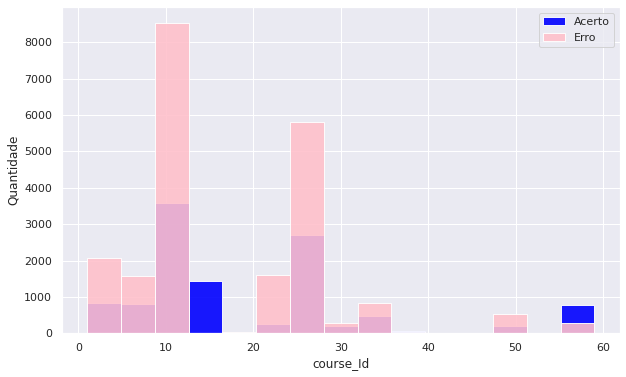

In [ ]:
plt.figure(figsize=(10, 6))
df[df['isRight'] == 1]['course_Id'].hist(alpha=0.9, color='blue', bins=15, label='Acerto')
df[df['isRight'] == 0]['course_Id'].hist(alpha=0.9, color='pink', bins=15, label='Erro')
plt.legend()
plt.xlabel('course_Id')
plt.ylabel('Quantidade')
plt.show()

### ***Dispersão***

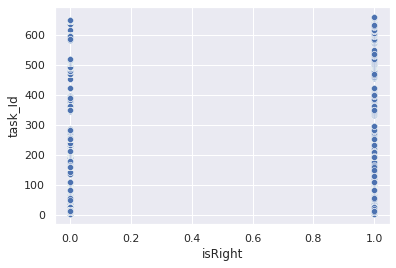

In [ ]:
sns.scatterplot(x="isRight", y="task_Id", data = df)

### ***BoxPlot***

In [ ]:
def countIntervalos(valorInicial, valorFinal):
  new_df = df.drop(columns='isRight')
  dfIntervalo = new_df[new_df['course_Id'] >= valorInicial]
  intervalo = len(dfIntervalo[new_df['course_Id'] <= valorFinal])
  return intervalo

  

In [ ]:
#curso.head()

In [ ]:
primeiroIntervalo = countIntervalos(35, 59)
primeiroIntervalo
segundoIntervalo = countIntervalos(28, 35)
segundoIntervalo
terceiroIntervalo = countIntervalos(22, 27)
terceiroIntervalo
quartoIntervalo = countIntervalos(11, 21)
quartoIntervalo
quintoIntervalo = countIntervalos(1, 8)
quintoIntervalo

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  after removing the cwd from sys.path.


5305

In [ ]:
df2 = pd.DataFrame({'contagem': [primeiroIntervalo, segundoIntervalo, terceiroIntervalo, quartoIntervalo, quintoIntervalo]})
df2.index = ['35-59', '28-35', '22-27', '11-21', '1-8']
df2

,contagem
35-59,1979
28-35,2533
22-27,9636
11-21,13591
1-8,5305


In [ ]:
# cumsum(axis=None, skipna=True, *args, **kwargs) Return cumulative sum over a DataFrame or Series axis.
df2['percentage'] = df2['contagem'].cumsum()/df2['contagem'].sum()*100
df2

,contagem,percentage
35-59,1979,5.988984
28-35,2533,13.654521
22-27,9636,42.815640
11-21,13591,83.945648
1-8,5305,100.000000


In [ ]:
df.describe()

,idUsrCrsExp,userProfile_Id,course_Id,challenge_Id,task_Id,taskOrder,isdone,isRight,tempoInteracao
count,32965.000000,32965.000000,32965.000000,32965.000000,32965.000000,32965.000000,32965.000000,32965.000000,32965.000000
mean,24342.795086,2108.252905,18.014349,90.557895,176.303443,2.691825,0.955347,0.344517,34.598756
std,5225.323333,997.608466,12.483434,93.158587,176.114128,2.114289,0.206545,0.475218,38.017029
min,14406.000000,7.000000,1.000000,3.000000,2.000000,1.000000,0.000000,0.000000,0.000000
25%,19412.000000,1472.000000,11.000000,28.000000,24.000000,1.000000,1.000000,0.000000,7.000000
50%,25314.000000,1941.000000,11.000000,45.000000,122.000000,2.000000,1.000000,0.000000,23.000000
75%,28437.000000,3096.000000,25.000000,127.000000,220.000000,4.000000,1.000000,1.000000,46.000000
max,32778.000000,4150.000000,59.000000,373.000000,660.000000,12.000000,1.000000,1.000000,197.000000


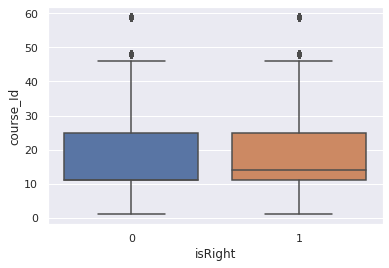

In [ ]:
sns.boxplot(x='isRight', y='course_Id', data=df)

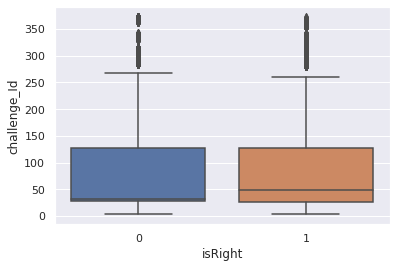

In [ ]:
sns.boxplot(x='isRight', y='challenge_Id', data=df)

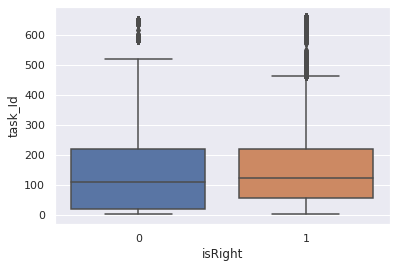

In [ ]:
sns.boxplot(x='isRight', y='task_Id', data=df)

### ***HeatMap***

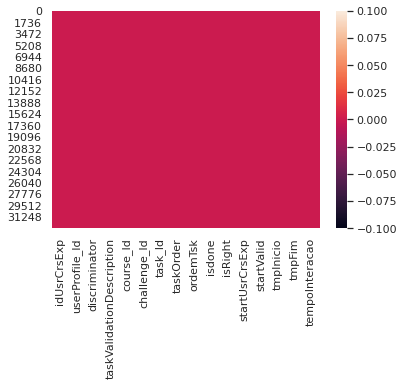

In [ ]:
sns.heatmap(df.isna())